# Hoja de trabajo # 2

Text Mining & Image Recognition

Eddson Sierra

In [290]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Problema 1

Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los valores 0 (negro) y 255 (blanco). 

Para ello, primero creamos una función que lee una imagen en escala de grises y la muestra. 

In [26]:
def ReadShowGray(strImg):
    img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    return img

Cargamos una imagen de ejemplo para utilizarla, posteriormente:

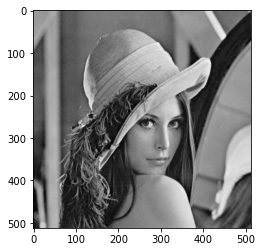

In [27]:
img = ReadShowGray('lena_gray_512.tif')

Creamos la función que binariza una imagen dada en escala de grises de acuerdo al umbral:

In [17]:
def binarizar(imagen, umbral):
    th, im_th = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
    return im_th

In [28]:
imgbin= binarizar(img, 128)
cv2.imwrite("img_binarizada.jpg",imgbin)

True

Validamos que la imagen resultante solo tiene los valores 0 y 255:

In [29]:
np.unique(imgbin)

array([  0, 255], dtype=uint8)

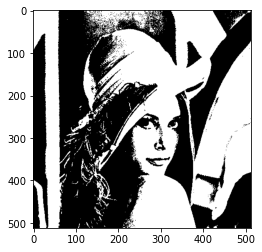

In [31]:
salida = ReadShowGray('img_binarizada.jpg')

## Problema 2

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA,
AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario
que la imagen esté binarizada. Para realizar las operaciones aritméticas se recomienda seleccionar
imágenes que lo permitan y que sea fácil revisar el resultado.

Para resolver este problema necesitaremos dos imágenes en escala de grises para las operaciones lógicas y dos imágenes a colores para las operaciones aritméticas. Las cargamos a continuación:

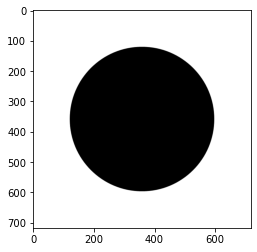

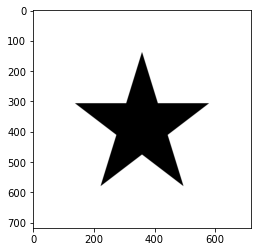

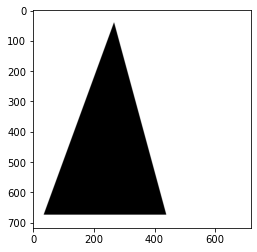

In [161]:
# imágenes en escala de grises
circulo = ReadShowGray('Slide1.png')
estrella = ReadShowGray('Slide2.png')
triangulo = ReadShowGray('Slide3.png')

In [162]:
# verificamos el tamaño de las imagenes
circulo.shape, estrella.shape, triangulo.shape

((718, 718), (718, 718), (718, 718))

Observamos que ni el circulo ni la estrella están binarizadas

In [163]:
np.unique(circulo), np.unique(estrella), np.unique(triangulo)

(array([  0,  16,  32,  48,  64,  88, 104, 120, 135, 151, 167, 191, 207,
        223, 239, 255], dtype=uint8),
 array([  0,  16,  32,  48,  72,  88, 104, 120, 135, 151, 167, 183, 207,
        223, 239, 255], dtype=uint8),
 array([  0,  16,  32,  48,  64,  88, 104, 120, 135, 151, 167, 183, 207,
        223, 239, 255], dtype=uint8))

Binarizamos las imagenes haciendo uso de la función creada en el problema 1:

In [164]:
circulo_bin = binarizar(circulo, 128)
estrella_bin = binarizar(estrella, 128)
triangulo_bin = binarizar(triangulo, 128)

Para las imágenes a color podemos crear una función para leerlas:

In [38]:
def ReadShowColor(strImg):
    img = cv2.imread(strImg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

Cargaremos varias para probar:

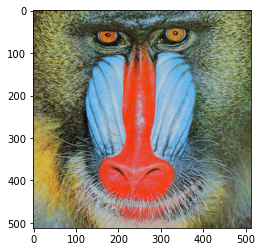

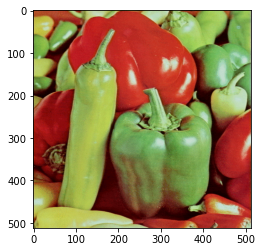

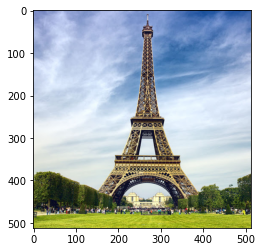

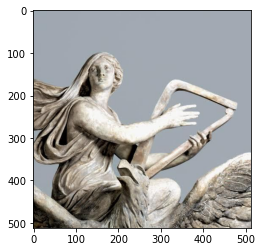

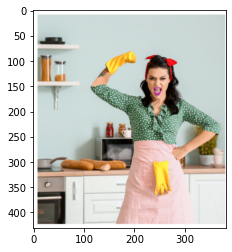

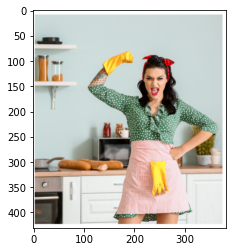

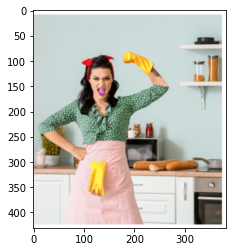

In [116]:
# imagenes a color
mandril = ReadShowColor('mandril_color.tif')
pimiento = ReadShowColor('peppers_color.tif')
torre = ReadShowColor('torre.jpg')
estatua = ReadShowColor('estatua.jpg')
cocina1= ReadShowColor('cocina1.png')
cocina2 = ReadShowColor('cocina2.png')
cocina3 = ReadShowColor('cocina3.png')

In [117]:
# verificamos el tamaño de las imágenes
cocina1.shape, cocina2.shape, cocina3.shape

((431, 381, 3), (431, 381, 3), (431, 381, 3))

### Operaciones Aritméticas
#### Suma

In [138]:
def suma(img1, img2):
    
    if img1.shape == img2.shape:
        alto = img1.shape[1]
        ancho = img1.shape[0]
        profundidad = img1.shape[2]
        
        new_img = np.zeros((ancho, alto, profundidad), dtype = float)
        
        for i in range(0, ancho):
            for j in range(0, alto):
                nuevo_pixel = img1[i,j] + img2[i,j]
                new_img[i,j] = nuevo_pixel
    else:
        print("Las imágenes no son del mismo tamaño!")
        
    return new_img

In [141]:
img_suma = suma(cocina1, cocina3)
cv2.imwrite("img_suma.jpg",img_suma)

True

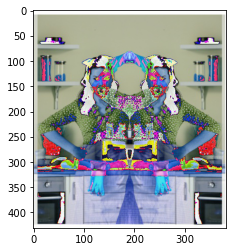

In [142]:
sumaImg = ReadShowColor("img_suma.jpg")

#### Resta

In [143]:
def resta(img1, img2):
    
    if img1.shape == img2.shape:
        alto = img1.shape[1]
        ancho = img1.shape[0]
        profundidad = img1.shape[2]
        
        new_img = np.zeros((ancho, alto, profundidad), dtype = float)
        
        for i in range(0, ancho):
            for j in range(0, alto):
                nuevo_pixel = img1[i,j] - img2[i,j]
                new_img[i,j] = nuevo_pixel
    else:
        print("Las imágenes no son del mismo tamaño!")
        
    return new_img

In [146]:
img_resta = resta(cocina2,cocina1)
cv2.imwrite("img_resta.jpg",img_resta)

True

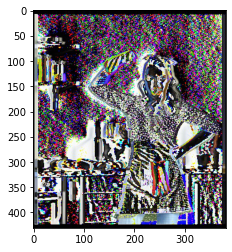

In [147]:
restaImg = ReadShowColor("img_resta.jpg")

### Operaciones Lógicas

#### AND

In [230]:
def AND(img1, img2):
    alto = img1.shape[0]
    ancho = img1.shape[1]

    new_img = np.zeros((alto, ancho, 1), dtype = float)
    
    for i in range(0, alto):
        for j in range(0, ancho):
            if (img1[i,j] ==0 and img2[i,j] ==0):
                new_img[i,j] = 0
            else:
                new_img[i,j] = 255
    return new_img

In [231]:
img_AND = AND(triangulo_bin, circulo_bin)
cv2.imwrite("img_AND.jpg",img_AND)

True

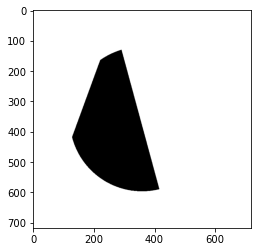

In [232]:
andImg = ReadShowGray("img_AND.jpg")

#### OR

In [227]:
def OR(img1, img2):
    alto = img1.shape[0]
    ancho = img1.shape[1]

    new_img = np.zeros((alto, ancho, 1), dtype = float)
    
    for i in range(0, alto):
        for j in range(0, ancho):
            if (img1[i,j] ==0 or img2[i,j] ==0):
                new_img[i,j] = 0
            else:
                new_img[i,j] = 255
    return new_img

In [228]:
img_OR = OR(triangulo_bin, circulo_bin)
cv2.imwrite("img_OR.jpg",img_OR)

True

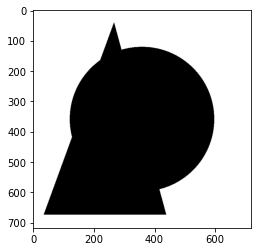

In [229]:
orImg = ReadShowGray("img_OR.jpg")

#### XOR

In [233]:
def XOR(img1, img2):
    alto = img1.shape[0]
    ancho = img1.shape[1]

    new_img = np.zeros((alto, ancho, 1), dtype = float)
    
    for i in range(0, alto):
        for j in range(0, ancho):
            if (img1[i,j] != img2[i,j]):
                new_img[i,j] = 0
            else:
                new_img[i,j] = 255
    return new_img

In [234]:
img_XOR = XOR(triangulo_bin, circulo_bin)
cv2.imwrite("img_XOR.jpg",img_XOR)

True

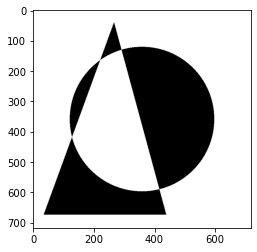

In [235]:
xorImg = ReadShowGray("img_XOR.jpg")

## Problema 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

Para este problema podemos usar las siguientes imagenes:

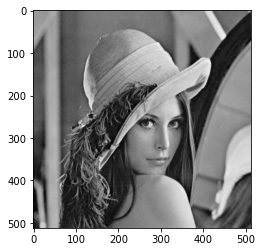

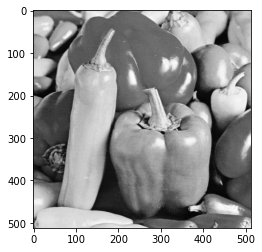

In [300]:
img = ReadShowGray('lena_gray_512.tif')
pimiento_gris = ReadShowGray('peppers_gray.tif')

In [332]:
def tridimensional(img, angulo_z):
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
    ax.view_init(angulo_z, 200)
    plt.show()

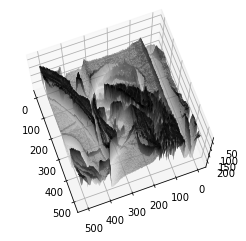

In [340]:
tridimensional(img, -108)

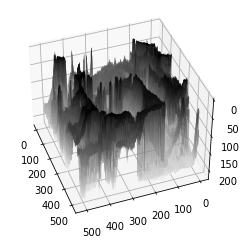

In [333]:
tridimensional(pimiento_gris, -140)

## Problema 4

Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial. Puede utilizar la misma función configurable por medio de parámetros, por ejemplo, si se ingresa 1 en el parámetro de selección se deberá realizar una transformación lineal, si se ingresa 2 se deberá realizar una transformación logarítmica y así sucesivamente.

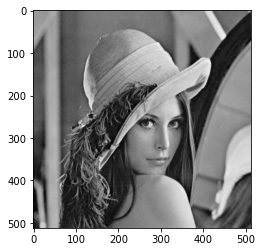

In [343]:
# imagen original
img = ReadShowGray('lena_gray_512.tif')

Primero procedemos a crear una función para cada transformación, y luego crearemos una función que integre todas las demás.

In [346]:
def negativa(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    new_img = np.zeros((alto, ancho,1), dtype = float)

    for j in range(0,alto):
        for i in range(0,ancho):
            r = img[i,j]
            s = 255 - r
            new_img[i,j] = s
    return new_img

In [349]:
ImgNeg = negativa(img)
cv2.imwrite("ImgNeg.jpg",ImgNeg)

True

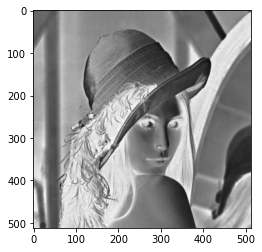

In [351]:
neg = ReadShowGray("ImgNeg.jpg")

In [352]:
def lineal(img, ganancia, offset):
    alto = img.shape[0]
    ancho = img.shape[1]

    new_img = np.zeros((alto, ancho,1), dtype = float)

    for j in range(0,alto):
        for i in range(0,ancho):
            r = img[i,j]
            s = ganancia*r+offset
            new_img[i,j] = s
    return new_img

In [367]:
ImgLin = lineal(img, 1.5,-1)
cv2.imwrite("ImgLineal.jpg",ImgLin)

True

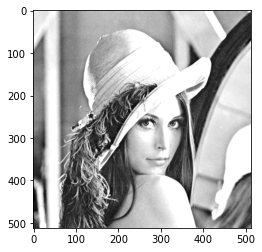

In [368]:
lin = ReadShowGray("ImgLineal.jpg")

In [369]:
def log(img, ganancia):
    alto = img.shape[0]
    ancho = img.shape[1]

    new_img = np.zeros((alto, ancho,1), dtype = float)

    for j in range(0,alto):
        for i in range(0,ancho):
            r = img[i,j]
            s = ganancia*np.log(1+r)
            new_img[i,j] = s
    return new_img

In [370]:
ImgLog = log(img, 1.5)
cv2.imwrite("ImgLog.jpg",ImgLog)

True

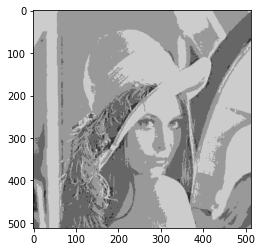

In [371]:
logar = ReadShowGray("ImgLog.jpg")

In [378]:
def exp(img, ganancia, gama):
    alto = img.shape[0]
    ancho = img.shape[1]

    new_img = np.zeros((alto, ancho,1), dtype = float)

    for j in range(0,alto):
        for i in range(0,ancho):
            r = img[i,j]/255
            s = ganancia*np.power(r,gama)
            new_img[i,j] = s
    return new_img

In [381]:
ImgExp = exp(img, 1.5,1)
cv2.imwrite("ImgExp.jpg",ImgExp)

True

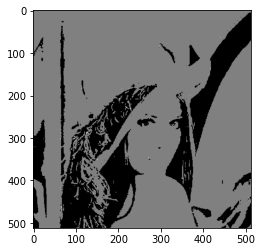

In [382]:
expo = ReadShowGray("ImgExp.jpg")

Ahora creamos la función final

In [384]:
def transformar(img, tipo, ganancia, offset, gama):
    if tipo == 'lineal':
        s = lineal(img, ganancia, offset)
    elif tipo == 'negativa':
        s = negativa(img)
    elif tipo == 'log':
        s = log(img, ganancia)
    elif tipo == 'exp':
        s = exp(img, ganancia, gama)
    return s

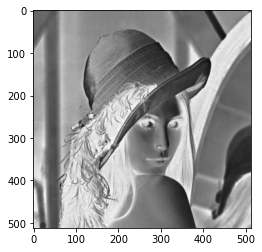

In [393]:
resultado = transformar(img, 'negativa', ganancia=1.5, offset = -1, gama = 1)
cv2.imwrite("transformacion.jpg",resultado)
salida = ReadShowGray("transformacion.jpg")

## Problema 5

Desarrolle una función que dada una imagen a color y kernel de cualquier dimensión (3X3, 5X5,7X7, 9X9) y de cualquier tipo (Gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filltro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

In [480]:
def convolucion(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    indice_central = int(anchoKernel/2)

    newImg = np.zeros((alto, ancho, 3))
    
    for i in range(indice_central, alto - step):
        newPixel = 0
        for j in range(indice_central, ancho - step):
            ventana = imagen[i-indice_central:i+2*indice_central, j-indice_central:j+2*indice_central]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = newPixel
 
    print('Imagen original:')
    cv2.imwrite('original.jpg',imagen)
    original = cv2.imread('original.jpg', cv2.COLOR_BGR2RGB)
    plt.imshow(original)
    plt.show()
    
    print('Imagen con convolución:')
    cv2.imwrite('convolucion.jpg',newImg)
    salida = cv2.imread('convolucion.jpg', cv2.COLOR_BGR2RGB)
    plt.imshow(salida)
    plt.show() 

Podemos crear varios kernels y hacer distintas pruebas con la misma imagen:

In [483]:
kernel_gaussiano = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]], dtype = float)
deteccion_bordes = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype = float)
enfoque = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype = float)

Imagen original:


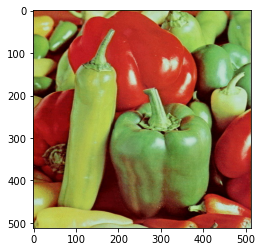

Imagen con convolución:


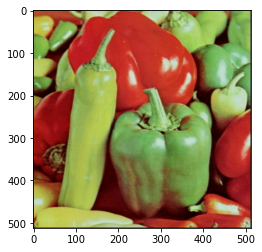

In [481]:
convolucion(pimiento, kernel = kernel_gaussiano)

Imagen original:


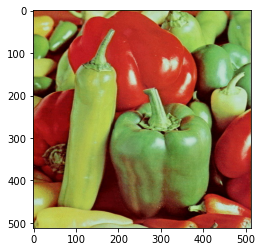

Imagen con convolución:


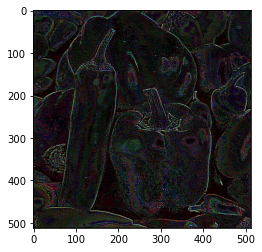

In [482]:
convolucion(pimiento, kernel = deteccion_bordes)

Imagen original:


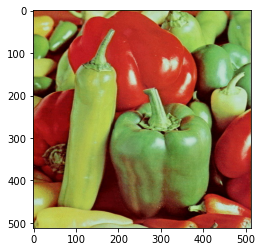

Imagen con convolución:


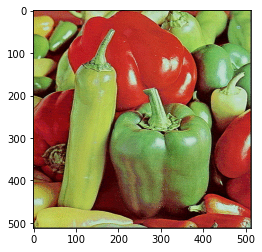

In [484]:
convolucion(pimiento, kernel = enfoque)